# Laboratorio 05
# Nombres:
-	Mollo Condori Abel
-	Jorge Cedillo Luis Fabian
-	Ibarra Calderon Luis Alberto
-   Soliz Ortega David Franz


# ML - Aprendizaje No Supervisado

In [1]:
import numpy as np  # Para operaciones matemáticas y manejo de arreglos/matrices 
import matplotlib.pyplot as plt  # Para crear gráficos y visualizar datos 
import matplotlib as mpl  # Para configuraciones avanzadas de gráficos, como estilos y parámetros globales
from matplotlib.ticker import FixedLocator, FixedFormatter  # Para personalizar los ejes de los gráficos 
from sklearn.datasets import make_blobs  # Para generar datasets de prueba con grupos o 'clusters' definidos (ideal para entrenar y probar KMeans)

from sklearn.metrics import silhouette_score, silhouette_samples  
# silhouette_score: mide qué tan bien están definidos los clusters (valor entre -1 y 1)
# silhouette_samples: da el valor silhouette individual de cada punto (útil para ver qué tan bien encaja cada dato en su cluster)
#from sklearn.metrics import silhouette_score, silhouette_samples

# Punto 1

In [2]:
RANDOM_STATE = 42

def generar_dataset(n_centroides, n_muestras=5000):
  #x coordenas y etiquetas 
    X, y = make_blobs(n_samples=n_muestras,
                      centers=n_centroides,
                      cluster_std=1.5, #dispersion cual separa o junta
                      center_box=(-10,25), #limite inf lim sup  
                      random_state=RANDOM_STATE)
    return X,y

In [3]:
def plot_clusters(X,n_centroides):
  
    # Visualización del dataset
    plt.figure(figsize=(10, 6)) #gráfica, tamaño de 10 ancho y 6 de alto
    plt.scatter(X[:, 0], X[:, 1], s=3)  #gráfico de dispersión 
    #X[:, 0]: todas las coordenadas del eje X
    # X[:, 1]: todas las coordenadas del eje Y
    # s=3: tamaño pequeño para los punto
    plt.title(f'Dataset con {n_centroides} centroides')
    plt.grid(True)
    plt.show()

# K-Means 
El algoritmo de K-Means es uno de los más usados a la hora de aplicar Clustering, ya que es un metodo rapido y eficiente. Vamos a generar un conjunto de datos sintetico para aprender a usar esta tecnica.

Generando dataset con 2 centroides


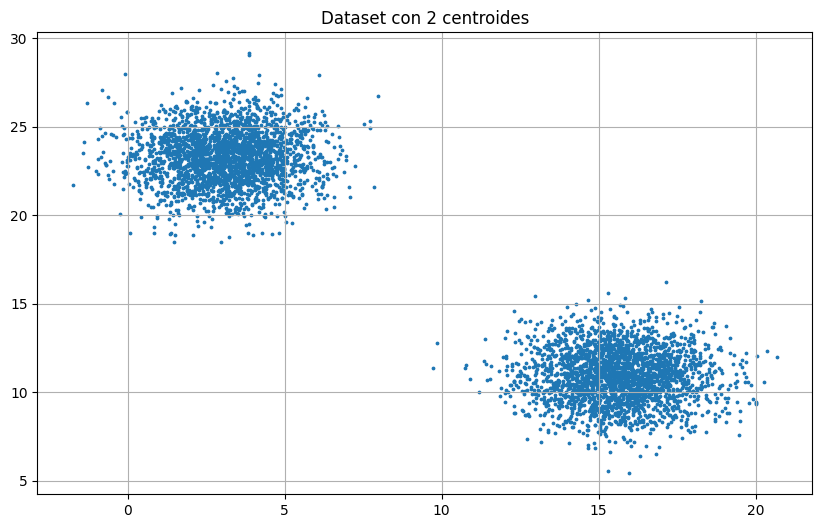

valores de x: [[ 3.6114912  23.74923466]
 [ 5.5831255  24.88091656]
 [14.28247273 11.05760335]
 ...
 [ 3.75729859 23.98006701]
 [15.5995331   9.29294747]
 [ 5.20829613 21.2618091 ]]


In [4]:
n_centroides = np.random.randint(1, 21)
X,y=generar_dataset(n_centroides) # crear el conjunto de datos (X) y  etiquetas clusters (y).
print(f'Generando dataset con {n_centroides} centroides')
plot_clusters(X,n_centroides)
print(f"valores de x: {X}") #las coordenadas de los puntos generados en el dataset (X)

Uso de K-Means
es un algoritmo para agrupar los datos en clusters, que se basan en sus caracteristicas similares.

In [5]:
from sklearn.cluster import KMeans #permite agrupar los cluster

k = n_centroides
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) #fit_predict realiza dos cosas: Ajusta el modelo KMeans a los datos de entrada X
# agrupa los puntos de acuerdo con el número de clusters que se definió (en este caso k). 
print(y_pred)
X.shape

[1 1 0 ... 1 0 1]


(5000, 2)

la cantidad de labels es: 5000


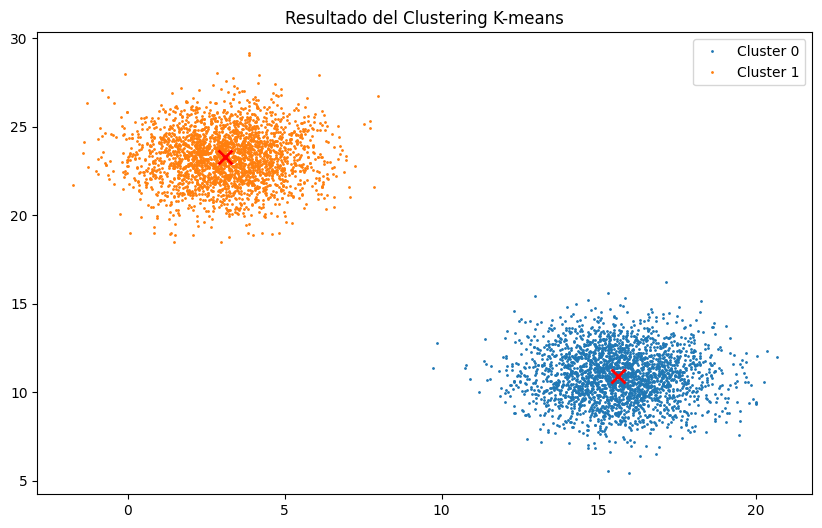

In [6]:
plt.figure(figsize=(10, 6))
for i in range(k): # Itera a través de todos los clusters.
               #Filtra los puntos de X que pertenecen al cluster i
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
          #Extrae coordenadas X de los puntos d este cluster.
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'x', color='red', markersize=10, markeredgewidth=2)
            #Son las coordenadas X y Y
    plt.legend()
plt.title("Resultado del Clustering K-means")
print("la cantidad de labels es:",len(kmeans.labels_))

# Muestra de los centroides

Mostramos los centroides de los clusters obtenidos despues de ajustar el modelo K-Means a los datos

In [7]:
kmeans.cluster_centers_

array([[15.60813152, 10.93600087],
       [ 3.10475337, 23.29263806]])

definimos nuevas muestras para predicir sus clusters

In [8]:
X_new = np.array([[0, 2.5], [3, -1], [5, 1], [-2, 3], [2, -1], [0, -1.5]])
y_pred_new=kmeans.predict(X_new)
print(y_pred_new)
# son los cluster


[0 0 0 0 0 0]


# Graficamos los puntos originales y mostramos las muestras generadas

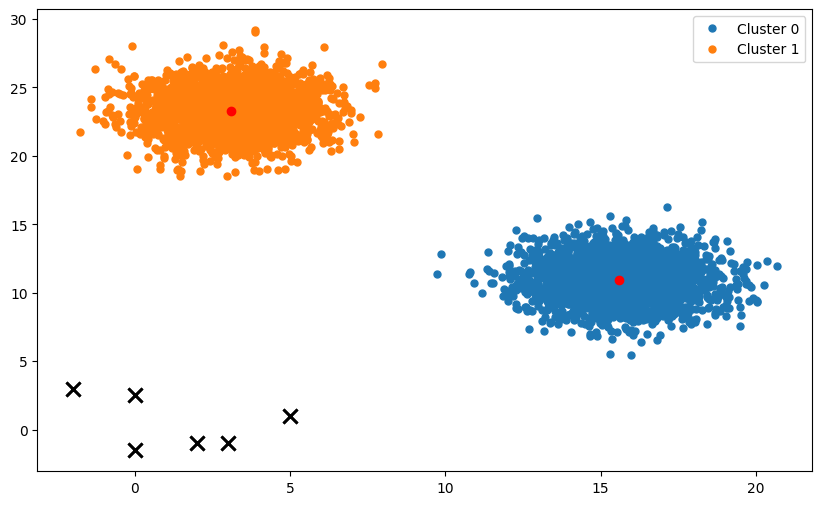

In [9]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=5)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.plot(X_new[:, 0], X_new[:, 1], 'x', color='black', markersize=10, markeredgewidth=2)
    plt.legend()

In [10]:
#aplica la transformacion de distancia del modelo K-Means a los nuevos datos X_new
kmeans.transform(X_new)

array([[17.74203709, 21.02316082],
       [17.36182874, 24.29286392],
       [14.53466779, 22.37305682],
       [19.31389152, 20.92485762],
       [18.10108727, 24.31774545],
       [19.9566502 , 24.98628415]])

Prediccion de cada muestra muestra

In [11]:
i = 0
for y in y_pred_new:
  print(f'El punto {X_new[i]} pertenece al cluster {y}')
  i += 1

El punto [0.  2.5] pertenece al cluster 0
El punto [ 3. -1.] pertenece al cluster 0
El punto [5. 1.] pertenece al cluster 0
El punto [-2.  3.] pertenece al cluster 0
El punto [ 2. -1.] pertenece al cluster 0
El punto [ 0.  -1.5] pertenece al cluster 0


In [13]:
def plot_data(X): #todo los puntos 
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
                              #como puntos negros pequeño
#Esta función dibuja los centroides de los clusters
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
      #Si se pasa un array weights, solo se grafican los centroides con peso significativo
       #Se eliminan los centroides cuyo peso bajo del 10% del mayor)
        centroids = centroids[weights > weights.max() / 10]
           #Dibuja los centroides como círculos grandes 
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
     #Dibuja encima una cruz negra
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)
#dibuja los límites de decisión
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    #Calcula los límites
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    # Crea una malla de puntos sobre el plano XY
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    # para predecir el cluster al que pertenece cada punto de la malla.
    # Z contiene las etiquetas de cluster para todos esos puntos.
    # Se reorganiza Z para que tenga la misma forma que xx y yy (grilla)
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Dibuja un fondo coloreado
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    #Dibuja líneas negras
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

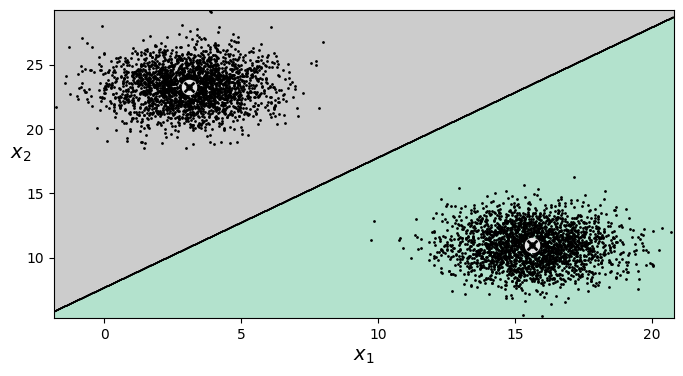

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [15]:
# Configuración del modelo K-Means con inicialización inteligente
                                    #inicialización más inteligente para los centroides
kmeans_iter1 = KMeans(n_clusters=k, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=2, n_init=1, random_state=1)

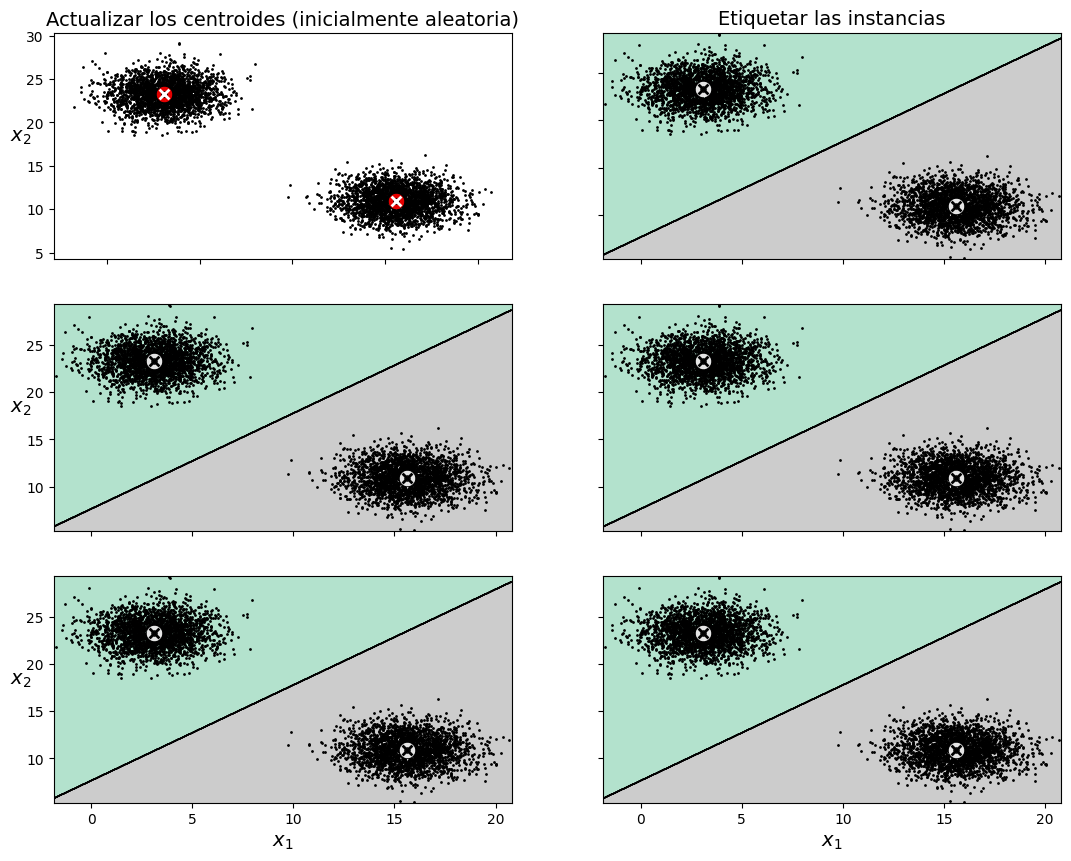

In [16]:
plt.figure(figsize=(13, 10))

plt.subplot(321) # Primer gráfico (fila 1, columna 1)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizar los centroides (inicialmente aleatoria)", fontsize=14)

plt.subplot(322) # Primer gráfico (fila 1, columna 2)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiquetar las instancias", fontsize=14)

plt.subplot(323)  # Segundo gráfico (fila 2, columna 1)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326) #Fronteras finales
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solucion u otra

In [17]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
     #clusterer1 2: modelos de clustering, X datos a los que se aplicarán los modelos
     #title1 y title2: títulos opcionales para los gráficos
    clusterer1.fit(X) #entrena
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2,fontsize=14)

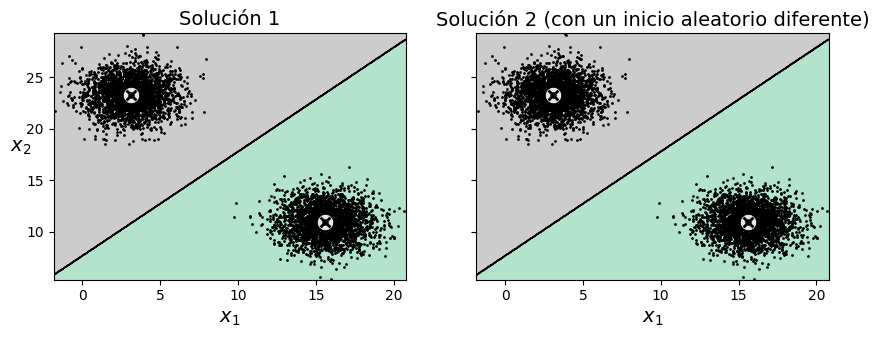

In [18]:
# Crear dos instancias de KMeans con diferentes configuraciones de inicializacion aleatoria y algoritmo "elkan"
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=19)

# Utilizando la función "plot_clusterer_comparison" comparamos las soluciones de clustering
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solución 1", "Solución 2 (con un inicio aleatorio diferente)")

# Mostrar los gráficos
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece Scikit-Learn por defecto.

In [19]:
# creamos un modelo KMeans que ejecutara el número de clusters ejecutando el proceso 10 veces para tener un mejor resultado
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10, algorithm="elkan", random_state=11)

# Entrenamos el modelo K-Means
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=2, n_init=10,
       random_state=11)

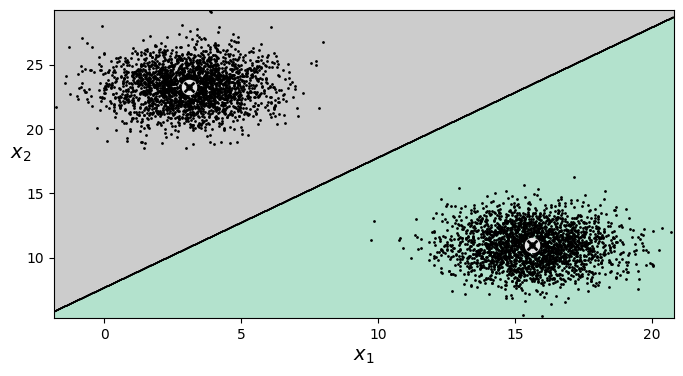

In [20]:
# Graficamos el modelo K-Means
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()


# Metodo del codo

In [21]:
inercia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

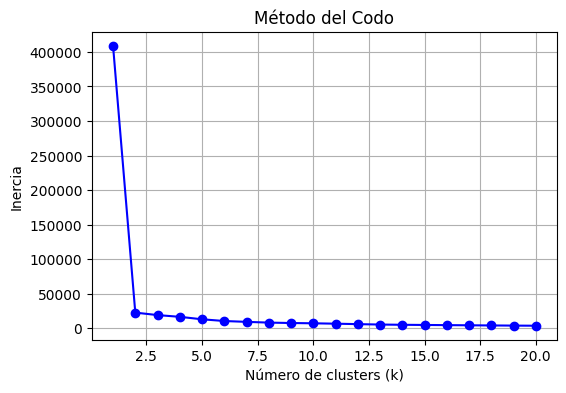

In [22]:
# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, 21), inercia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Encontramos el número optimo de grupos

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.31874482415412364)

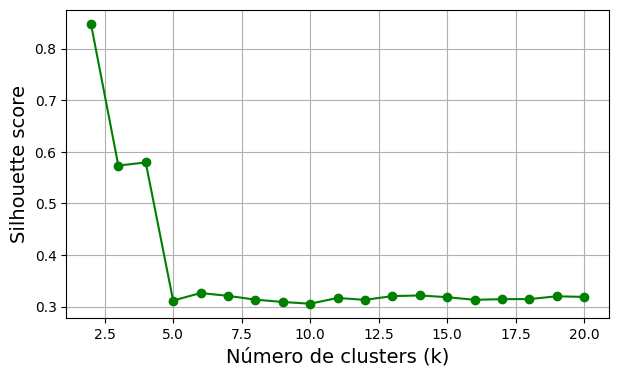

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 21)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(7,4))
plt.plot(range(2, 21), silhouette_scores, "go-")
plt.xlabel("Número de clusters (k)", fontsize=14)  # Cambiamos el nombre del eje
plt.ylabel("Silhouette score", fontsize=14)
plt.grid(True)
#plt.axis([1.8, 20.2, 0, 1])
plt.show()

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples
k_optimo = np.argmax(silhouette_scores) + 2
print(f'Número óptimo de clusters (según Silhouette Score): {k_optimo}')

Número óptimo de clusters (según Silhouette Score): 2


In [26]:
def visualizar_silhouettes(X):
    ks = range(2, 21)
    n_rows = 7
    n_cols = 3
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 25))
    axs = axs.flatten()

    silhouette_scores = []

    for idx, k in enumerate(ks):
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

        silhouette_coeffs = silhouette_samples(X, labels)
        padding = len(X) // 30
        pos = padding
        ticks = []

        ax = axs[idx]

        for i in range(k):
            coeffs = silhouette_coeffs[labels == i]
            coeffs.sort()
            color = mpl.cm.Spectral(i / k)
            ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        ax.yaxis.set_major_locator(FixedLocator(ticks))
        ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
        ax.axvline(x=score, color="red", linestyle="--")
        ax.set_title(f"k = {k} | Silhouette Avg = {score:.2f}")
        ax.set_xlim(-0.1, 1)
        ax.set_ylim(0, pos)

    # Eliminar subplots vacíos (si sobran)
    for j in range(len(ks), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle("Visualización de Silhouette por Clusters (k=2 a k=20)", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

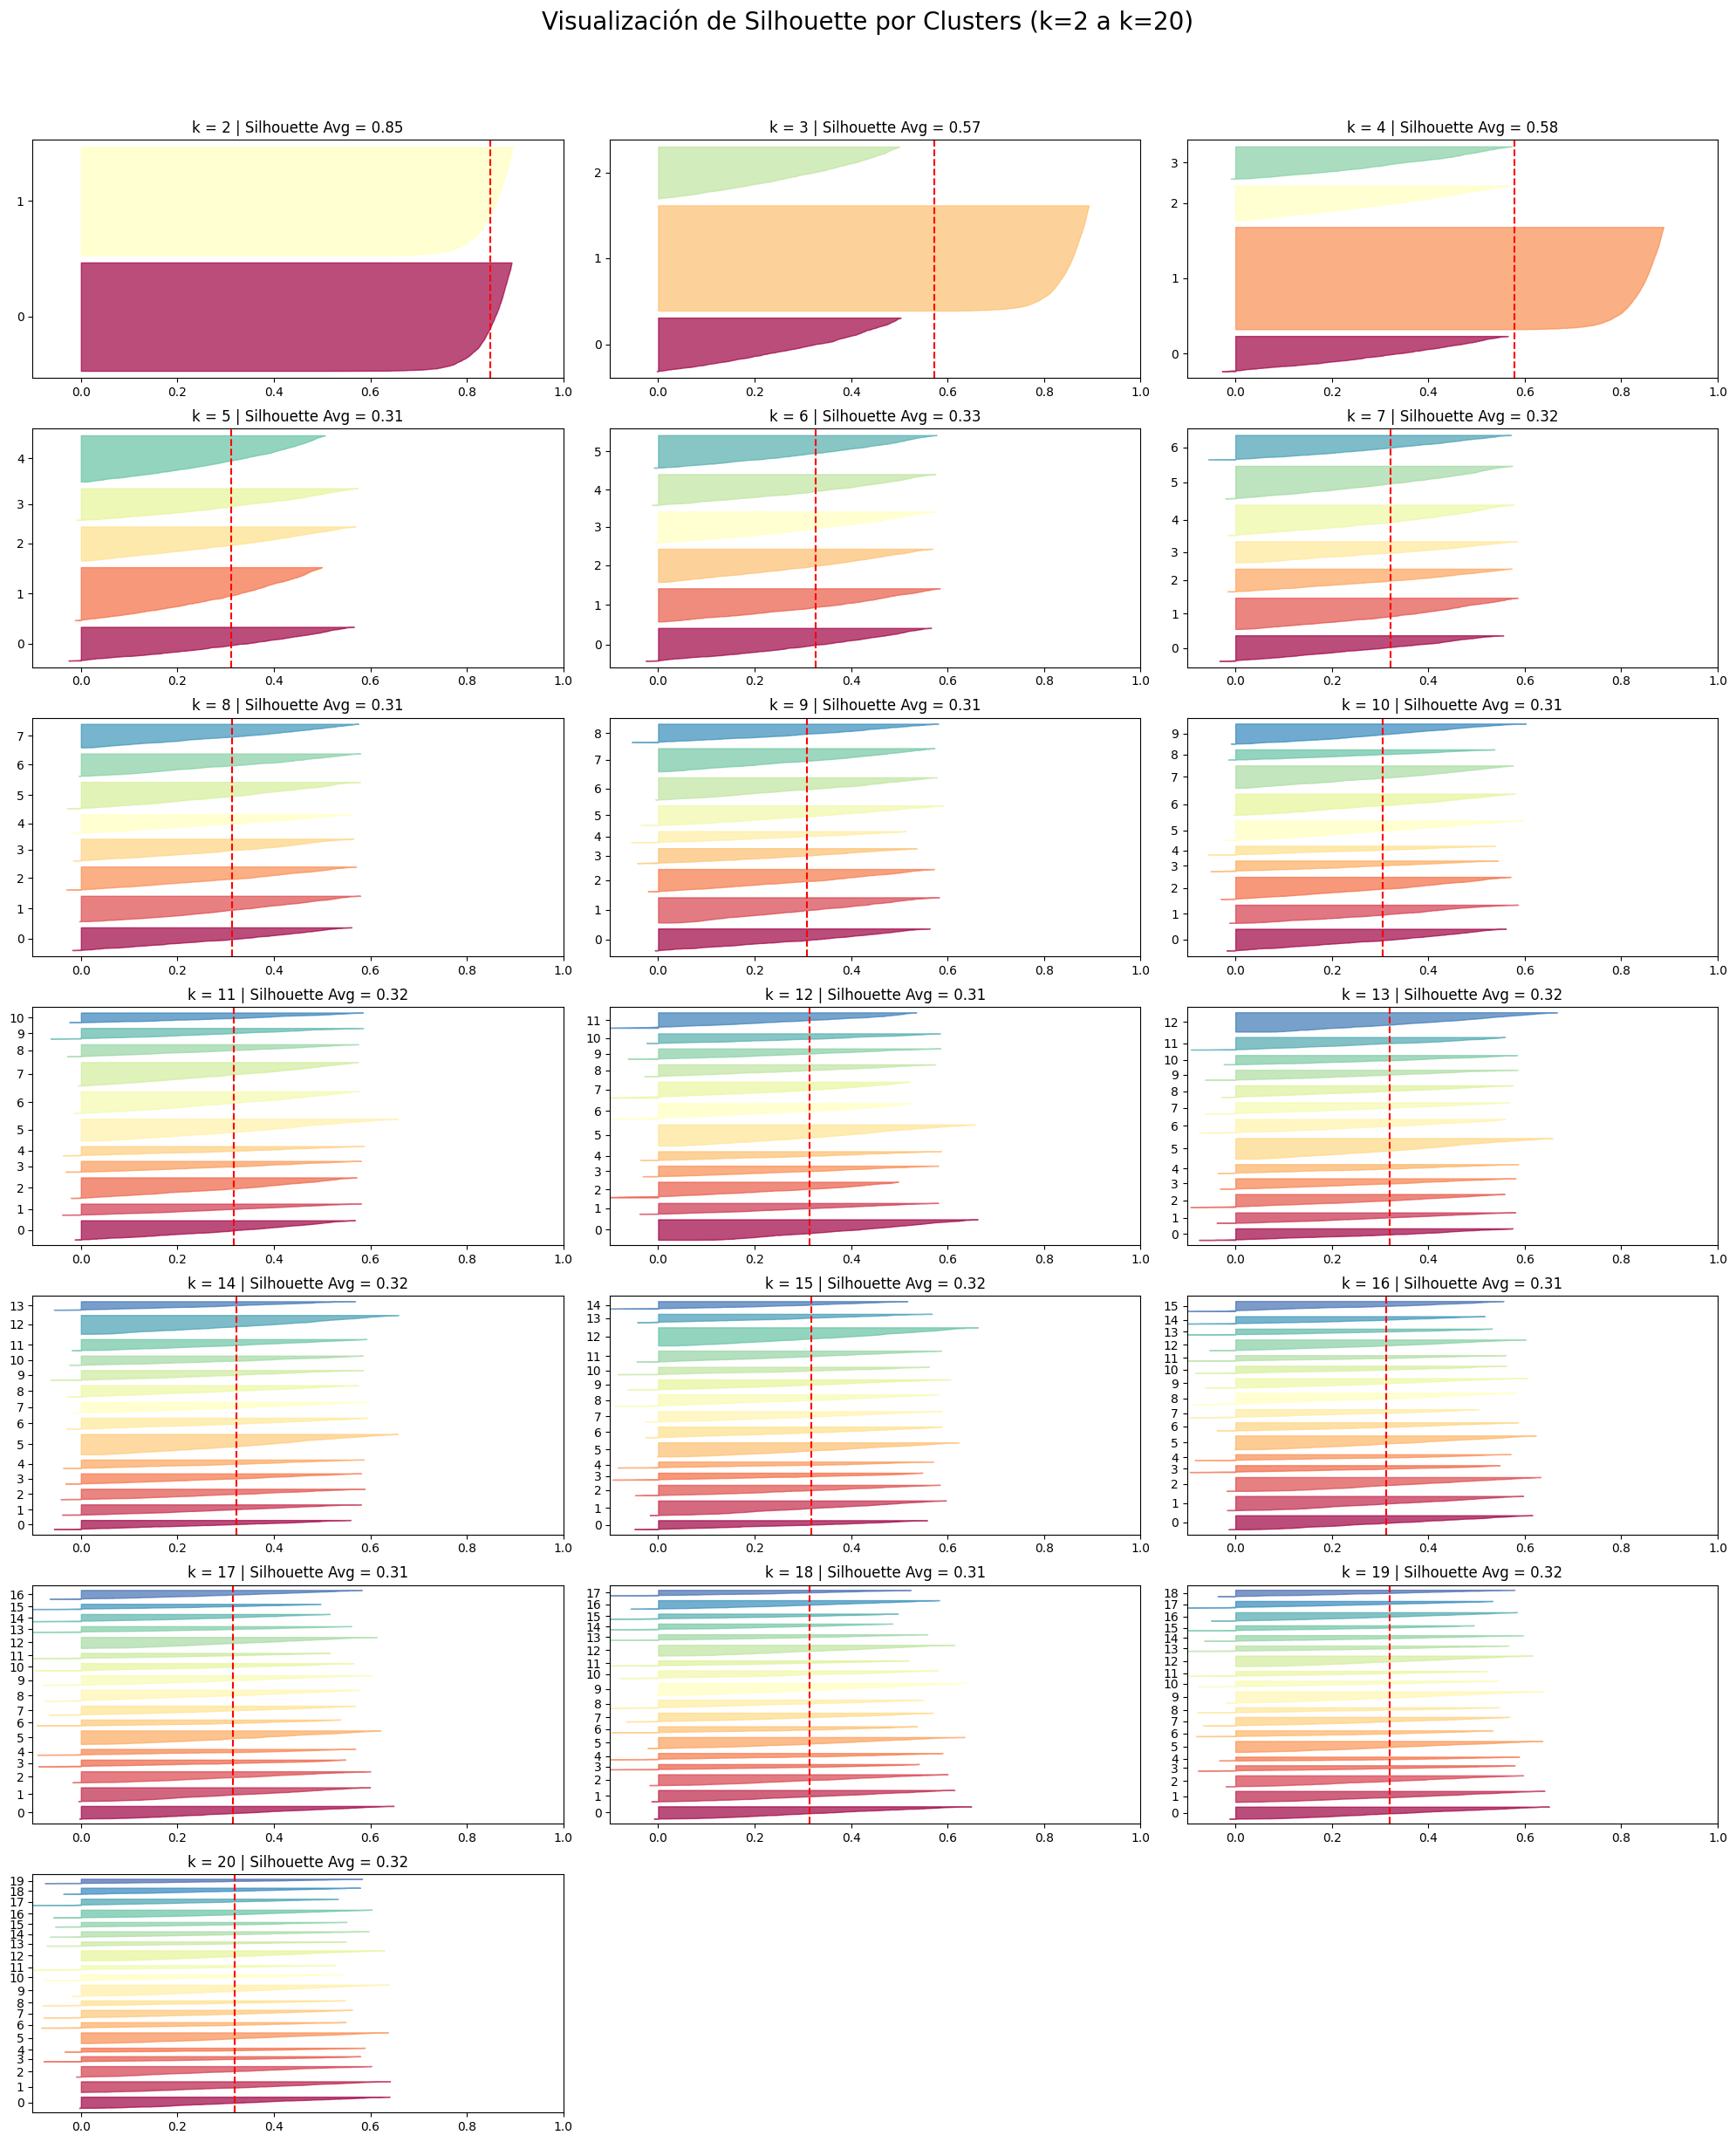

In [27]:
visualizar_silhouettes(X)

In [28]:
kmeans = KMeans(n_clusters=k_optimo, random_state=RANDOM_STATE)
labels = kmeans.fit_predict(X)

In [29]:
    # Visualización final
def visualizcion_final(labels): 
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=3)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='black', marker='x', s=110, label='Centroides')
    plt.title(f'KMeans con k óptimo = {k_optimo}')
    plt.legend()
    plt.grid(True)
    plt.show()

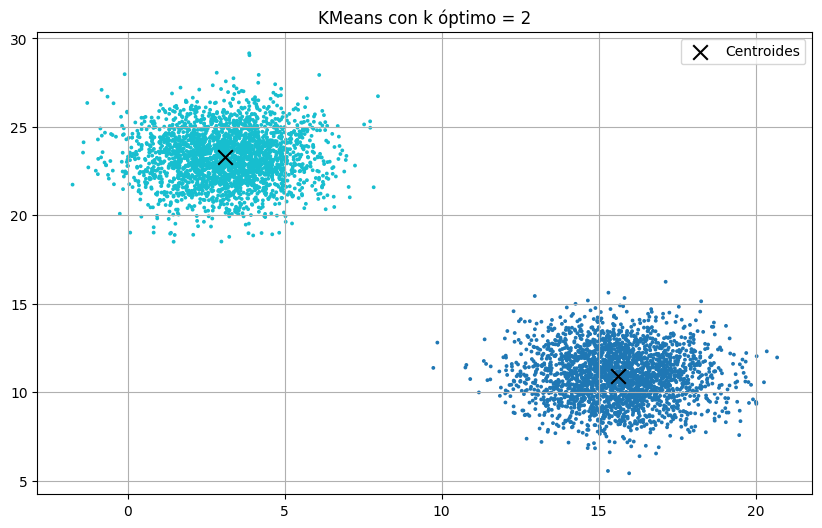

In [30]:
visualizcion_final(labels)

# Punto 2

# Aprendizaje semi-Supervisado

link del dataset: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

Son un conjunto de datos de reconocimiento de expresiones faciales que contiene imágenes en escala de grises de rostros humanos, cada una con dimensiones de 48x48 píxeles.

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

A continuación, se cargan las imágenes desde las carpetas de entrenamiento y validación. Cada imagen se redimensiona a 48x48 píxeles y se convierte en una matriz unidimensional para facilitar su procesamiento.

In [2]:
#=== Cargar imágenes ===
# Rutas a tus carpetas de imágenes
train_dir = 'C:/Users/OMEN/Documents/7mo Semestre-01-2025/Inteligencia Artificial/lab-005/dataset/images/train'
test_dir  = 'C:/Users/OMEN/Documents/7mo Semestre-01-2025/Inteligencia Artificial/lab-005/dataset/images/validation'

X = []
y = []
class_names = []

# Función para cargar imágenes de una carpeta dada (train o test)
def cargar_imagenes_desde_carpeta(root_dir, class_names_ref=None):
    local_X = []
    local_y = []
    if class_names_ref is None:
        class_names_ref = []

    for class_idx, class_name in enumerate(sorted(os.listdir(root_dir))):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            # Solo agregar clase si no está en la lista aún
            if class_name not in class_names_ref:
                class_names_ref.append(class_name)
            label_idx = class_names_ref.index(class_name)
            for filename in os.listdir(class_path):
                file_path = os.path.join(class_path, filename)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    img = Image.open(file_path)  # Asegura que sea en escala de grises
                    img = img.resize((48, 48))  # Asegura tamaño uniforme
                    local_X.append(np.array(img).flatten())  # aplana (48x48 = 2304)
                    local_y.append(label_idx)
    return local_X, local_y, class_names_ref

# Cargar imágenes de train y test
X_train_part, y_train_part, class_names = cargar_imagenes_desde_carpeta(train_dir)
X_test_part, y_test_part, class_names = cargar_imagenes_desde_carpeta(test_dir, class_names)

# Unir todos los datos
X = np.array(X_train_part + X_test_part)
y = np.array(y_train_part + y_test_part)

print("Cantidad total de imágenes:", len(X))


Cantidad total de imágenes: 35887


# Normalizacion de las imagenes

Para mejorar el rendimiento del modelo, se normalizan los valores de entrada. Esto asegura que cada característica (pixel) tenga media 0 y desviación estándar 1.

In [3]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Evitar división por cero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm

# Ya tienes X y y cargados aquí
X_norm = featureNormalize(X)

# Luego separar en train/test usando los datos normalizados

X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Normalizacion", X_train)
#print("Normalizacion", y_train)
#print("Normalizacion", y_test)


Tamaño de X_train: (28709, 2304)
Tamaño de X_test: (7178, 2304)
Normalizacion [[ 0.37579947  0.45792465  0.45203951 ...  0.50631589  0.51809294
   0.47693446]
 [-1.3343659  -1.39477607 -1.40478141 ... -1.24812821 -0.87712973
  -0.74186275]
 [-0.86134144 -0.48077705 -0.38854834 ...  1.47384021  1.47810854
   1.50529461]
 ...
 [-1.34649473 -1.25891135 -1.12876749 ... -1.27392886 -1.29953659
  -1.40204458]
 [-0.89772793 -0.80191184 -0.30072573 ... -1.24812821 -1.26113597
  -1.26239073]
 [-0.66728012 -0.61664177 -0.66456226 ... -0.82241751 -0.49312349
  -0.44985925]]


Se aplica el algoritmo K-Means para agrupar las imágenes en k=30 grupos (clústeres).
-Este paso ayuda a identificar patrones similares entre imágenes, sin usar etiquetas, el resultado que se obtendra sera una matriz con las distancias de cada imagen a los 30 centroides.

In [26]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# KMeans con k=50
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)  # Distancias a los centroides
labels = kmeans.fit_predict(X_train)  # etiquetas de los grupos
centroids = kmeans.cluster_centers_   # coordenadas de los centroides

print("Tamaño de X_digits_dist:", X_digits_dist)
print("Tamaño de X_digits_dist:", X_digits_dist.shape)

Tamaño de X_digits_dist: [[77.52708784 53.15580492 71.7084955  ... 60.55694745 86.46568737
  45.34096586]
 [41.52749284 45.98076651 47.63108181 ... 36.83494074 56.04149157
  42.29553921]
 [51.10658116 58.90997094 41.34193998 ... 58.60476026 40.92196351
  49.4991603 ]
 ...
 [59.0532558  71.82619086 59.38756244 ... 64.83602061 72.85165931
  51.12152396]
 [42.74513368 46.16667052 46.98855631 ... 36.02869398 53.18917454
  50.23045966]
 [35.57130078 38.66949714 33.62938178 ... 29.43414893 49.5337917
  29.42465479]]
Tamaño de X_digits_dist: (28709, 30)


In [27]:
def plot_clusters(X):
  
    # Visualización del dataset
    plt.figure(figsize=(10, 6)) #gráfica, tamaño de 10 ancho y 6 de alto
    plt.scatter(X[:, 0], X[:, 1], s=3)  #gráfico de dispersión 
    #X[:, 0]: todas las coordenadas del eje X
    # X[:, 1]: todas las coordenadas del eje Y
    # s=3: tamaño pequeño para los punto
    plt.title(f'Datos')
    plt.grid(True)
    plt.show()

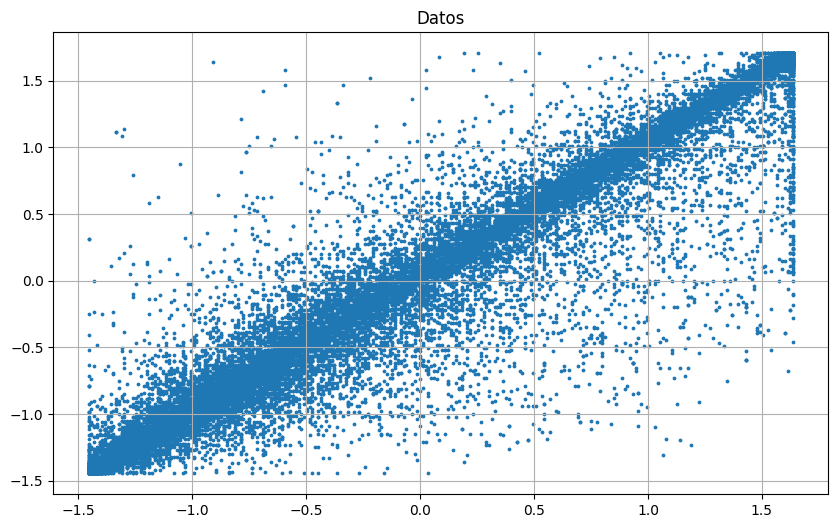

In [28]:
plot_clusters(X_train)
#print(f"valores de x: {X_train}") #las coordenadas de los puntos generados en el dataset (X)

Esta visualización grafica nos ayudara a entender cómo se distribuyen los datos en grupos 

In [9]:
# Mostrar todas las coordenadas de los centroides
print("Coordenadas de los centroides (completas):")
print(kmeans.cluster_centers_)

Coordenadas de los centroides (completas):
[[-0.33920534 -0.37896656 -0.39655464 ... -0.54228893 -0.52360737
  -0.4954493 ]
 [ 0.57930168  0.62700044  0.68567614 ... -0.29061713 -0.26646479
  -0.25871533]
 [ 0.43117063  0.46021124  0.49421835 ... -0.23022607 -0.21297569
  -0.18041537]
 ...
 [-0.29640071 -0.26846206 -0.26814137 ... -0.67966304 -0.64971119
  -0.63392599]
 [ 0.65911042  0.57080613  0.48304086 ...  0.87192485  0.85717965
   0.84833829]
 [-0.07562851 -0.01491793  0.02428145 ... -0.53863759 -0.52582613
  -0.50373607]]


30 centroides


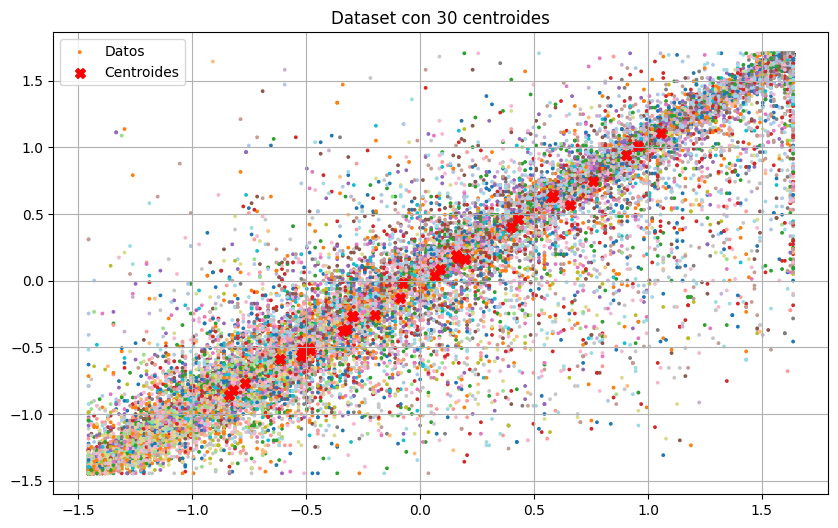

In [10]:
def plot_clusters(X, labels, centroids):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=3, label='Datos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='X', label='Centroides')
    plt.title(f'Dataset con {len(centroids)} centroides')
    plt.legend()
    plt.grid(True)
    plt.show()

print(f'{k} centroides')
plot_clusters(X_train, labels, centroids)


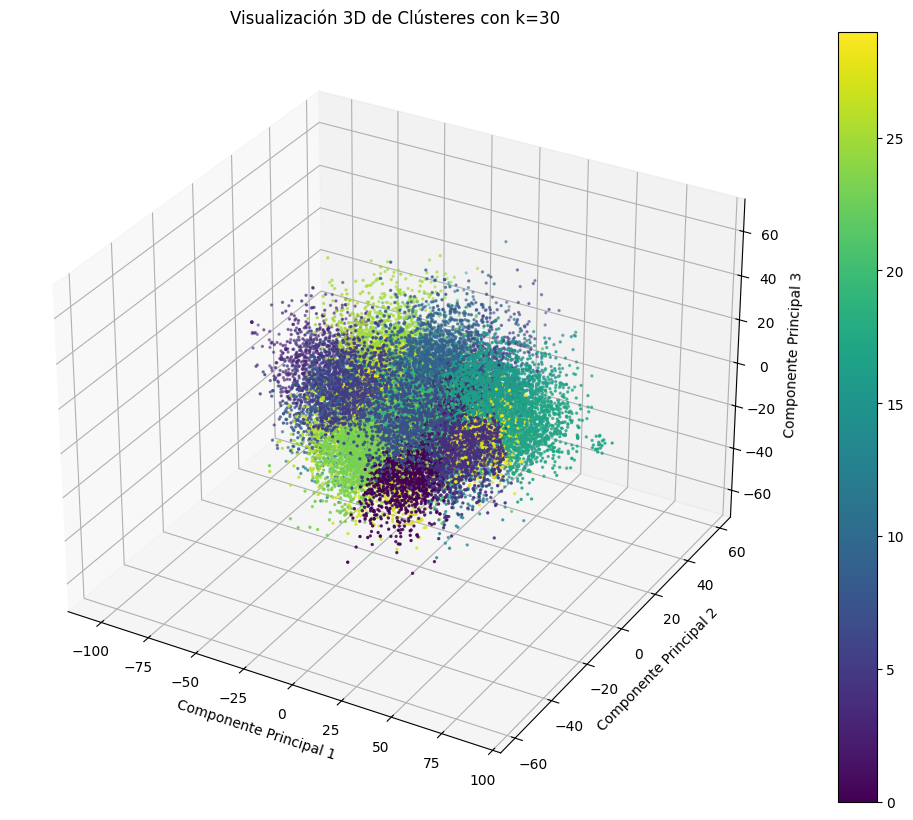

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reducir a 3 dimensiones con PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_train)

# Aplicar KMeans sobre los datos originales
k = 30
# Crear el modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)
labels = kmeans.labels_

# Graficar en 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', s=2)

# Títulos y etiquetas
ax.set_title(f'Visualización 3D de Clústeres con k={k}')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter)
plt.show()

Se utiliza el método del codo para encontrar un valor óptimo de k (número de clústeres) en el algoritmo K-Means.
Este método grafica la inercia "una medida de qué tan compactos son los clústeres" en función del número de clústeres.

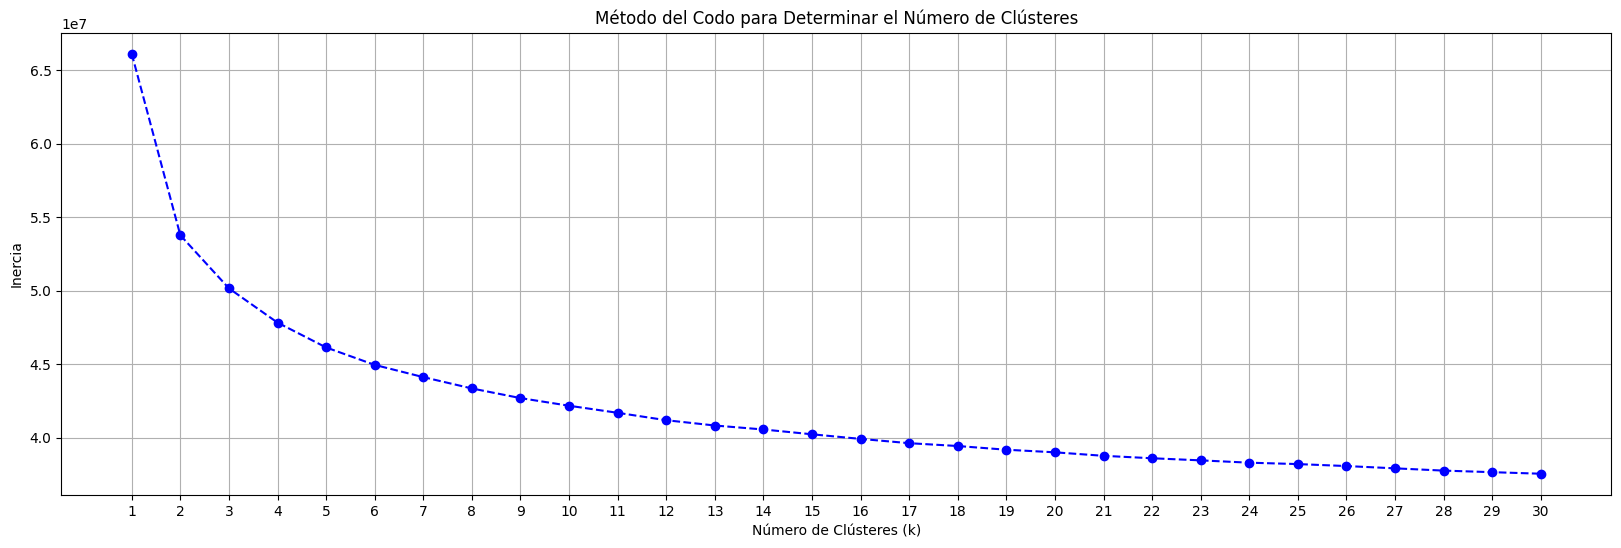

In [56]:
# Rango de valores de k para calcular la inercia
k_values = range(1, 31)  # Puedes cambiar el rango si necesitas más valores de k

# Almacenar la inercia para cada valor de k
inertia = []

# Realizar el cálculo de KMeans para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # Ajuste el modelo con tus datos
    inertia.append(kmeans.inertia_)  # Guarda la inercia para el valor de k

# Graficar la inercia en función de k
plt.figure(figsize=(20, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número de Clústeres')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Se utiliza la métrica Silhouette Score para evaluar la calidad de los clústeres generados por K-Means con distintos valores de k.

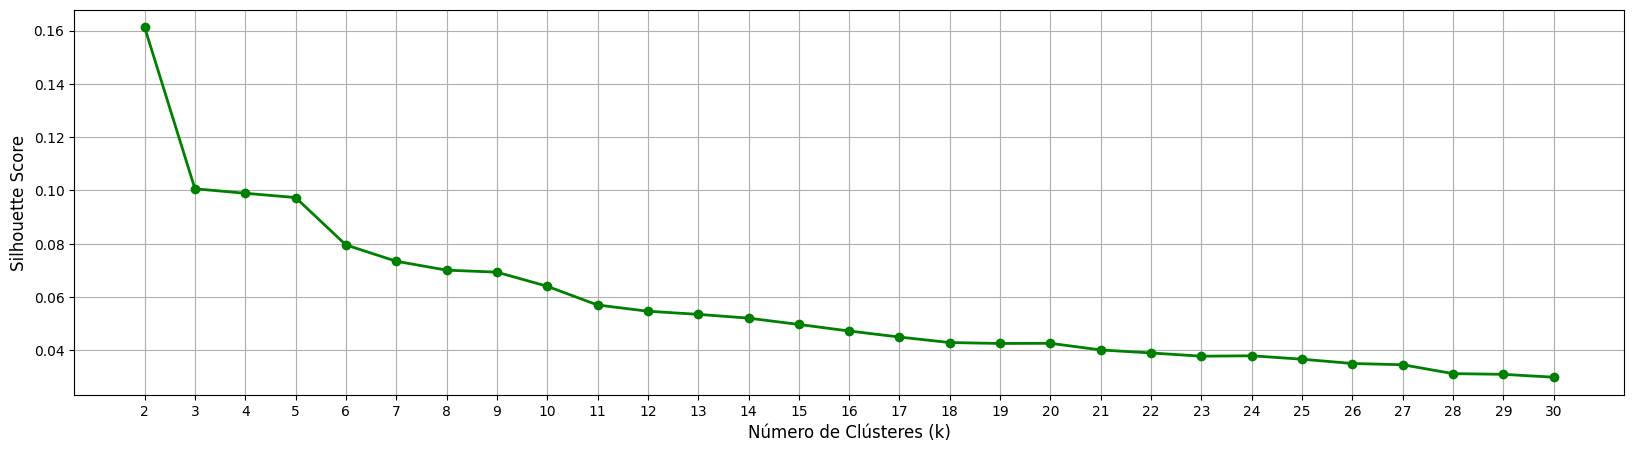

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Entrenar modelos KMeans para valores de k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1, 31)]

# Calcular Silhouette Score para cada modelo
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

# Graficar Silhouette Scores
plt.figure(figsize=(20, 5))
plt.plot(range(2, 31), silhouette_scores, "go-", linewidth=2)
plt.xlabel("Número de Clústeres (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(range(2, 31))
plt.grid(True)
plt.show()


In [87]:
from sklearn.metrics import silhouette_score, silhouette_samples
k_optimo = np.argmax(silhouette_scores) + 2
print(f'Número óptimo de clusters (según Silhouette Score): {k_optimo}')

Número óptimo de clusters (según Silhouette Score): 2


Esta función visualiza el coeficiente de Silhouette para cada punto dentro de los clústeres para diferentes valores de k (de 2 a 50).
El coeficiente de Silhouette indica qué tan similar es cada punto con su propio clúster en comparación con otros clústeres.

In [60]:
def visualizar_silhouettes(X):
    ks = range(2, 21)
    n_rows = 7
    n_cols = 3
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 25))
    axs = axs.flatten()

    silhouette_scores = []

    for idx, k in enumerate(ks):
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

        silhouette_coeffs = silhouette_samples(X, labels)
        padding = len(X) // 30
        pos = padding
        ticks = []

        ax = axs[idx]

        for i in range(k):
            coeffs = silhouette_coeffs[labels == i]
            coeffs.sort()
            color = mpl.cm.Spectral(i / k)
            ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        ax.yaxis.set_major_locator(FixedLocator(ticks))
        ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
        ax.axvline(x=score, color="red", linestyle="--")
        ax.set_title(f"k = {k} | Silhouette Avg = {score:.2f}")
        ax.set_xlim(-0.1, 1)
        ax.set_ylim(0, pos)

    # Eliminar subplots vacíos (si sobran)
    for j in range(len(ks), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle("Visualización de Silhouette por Clusters (k=2 a k=25)", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

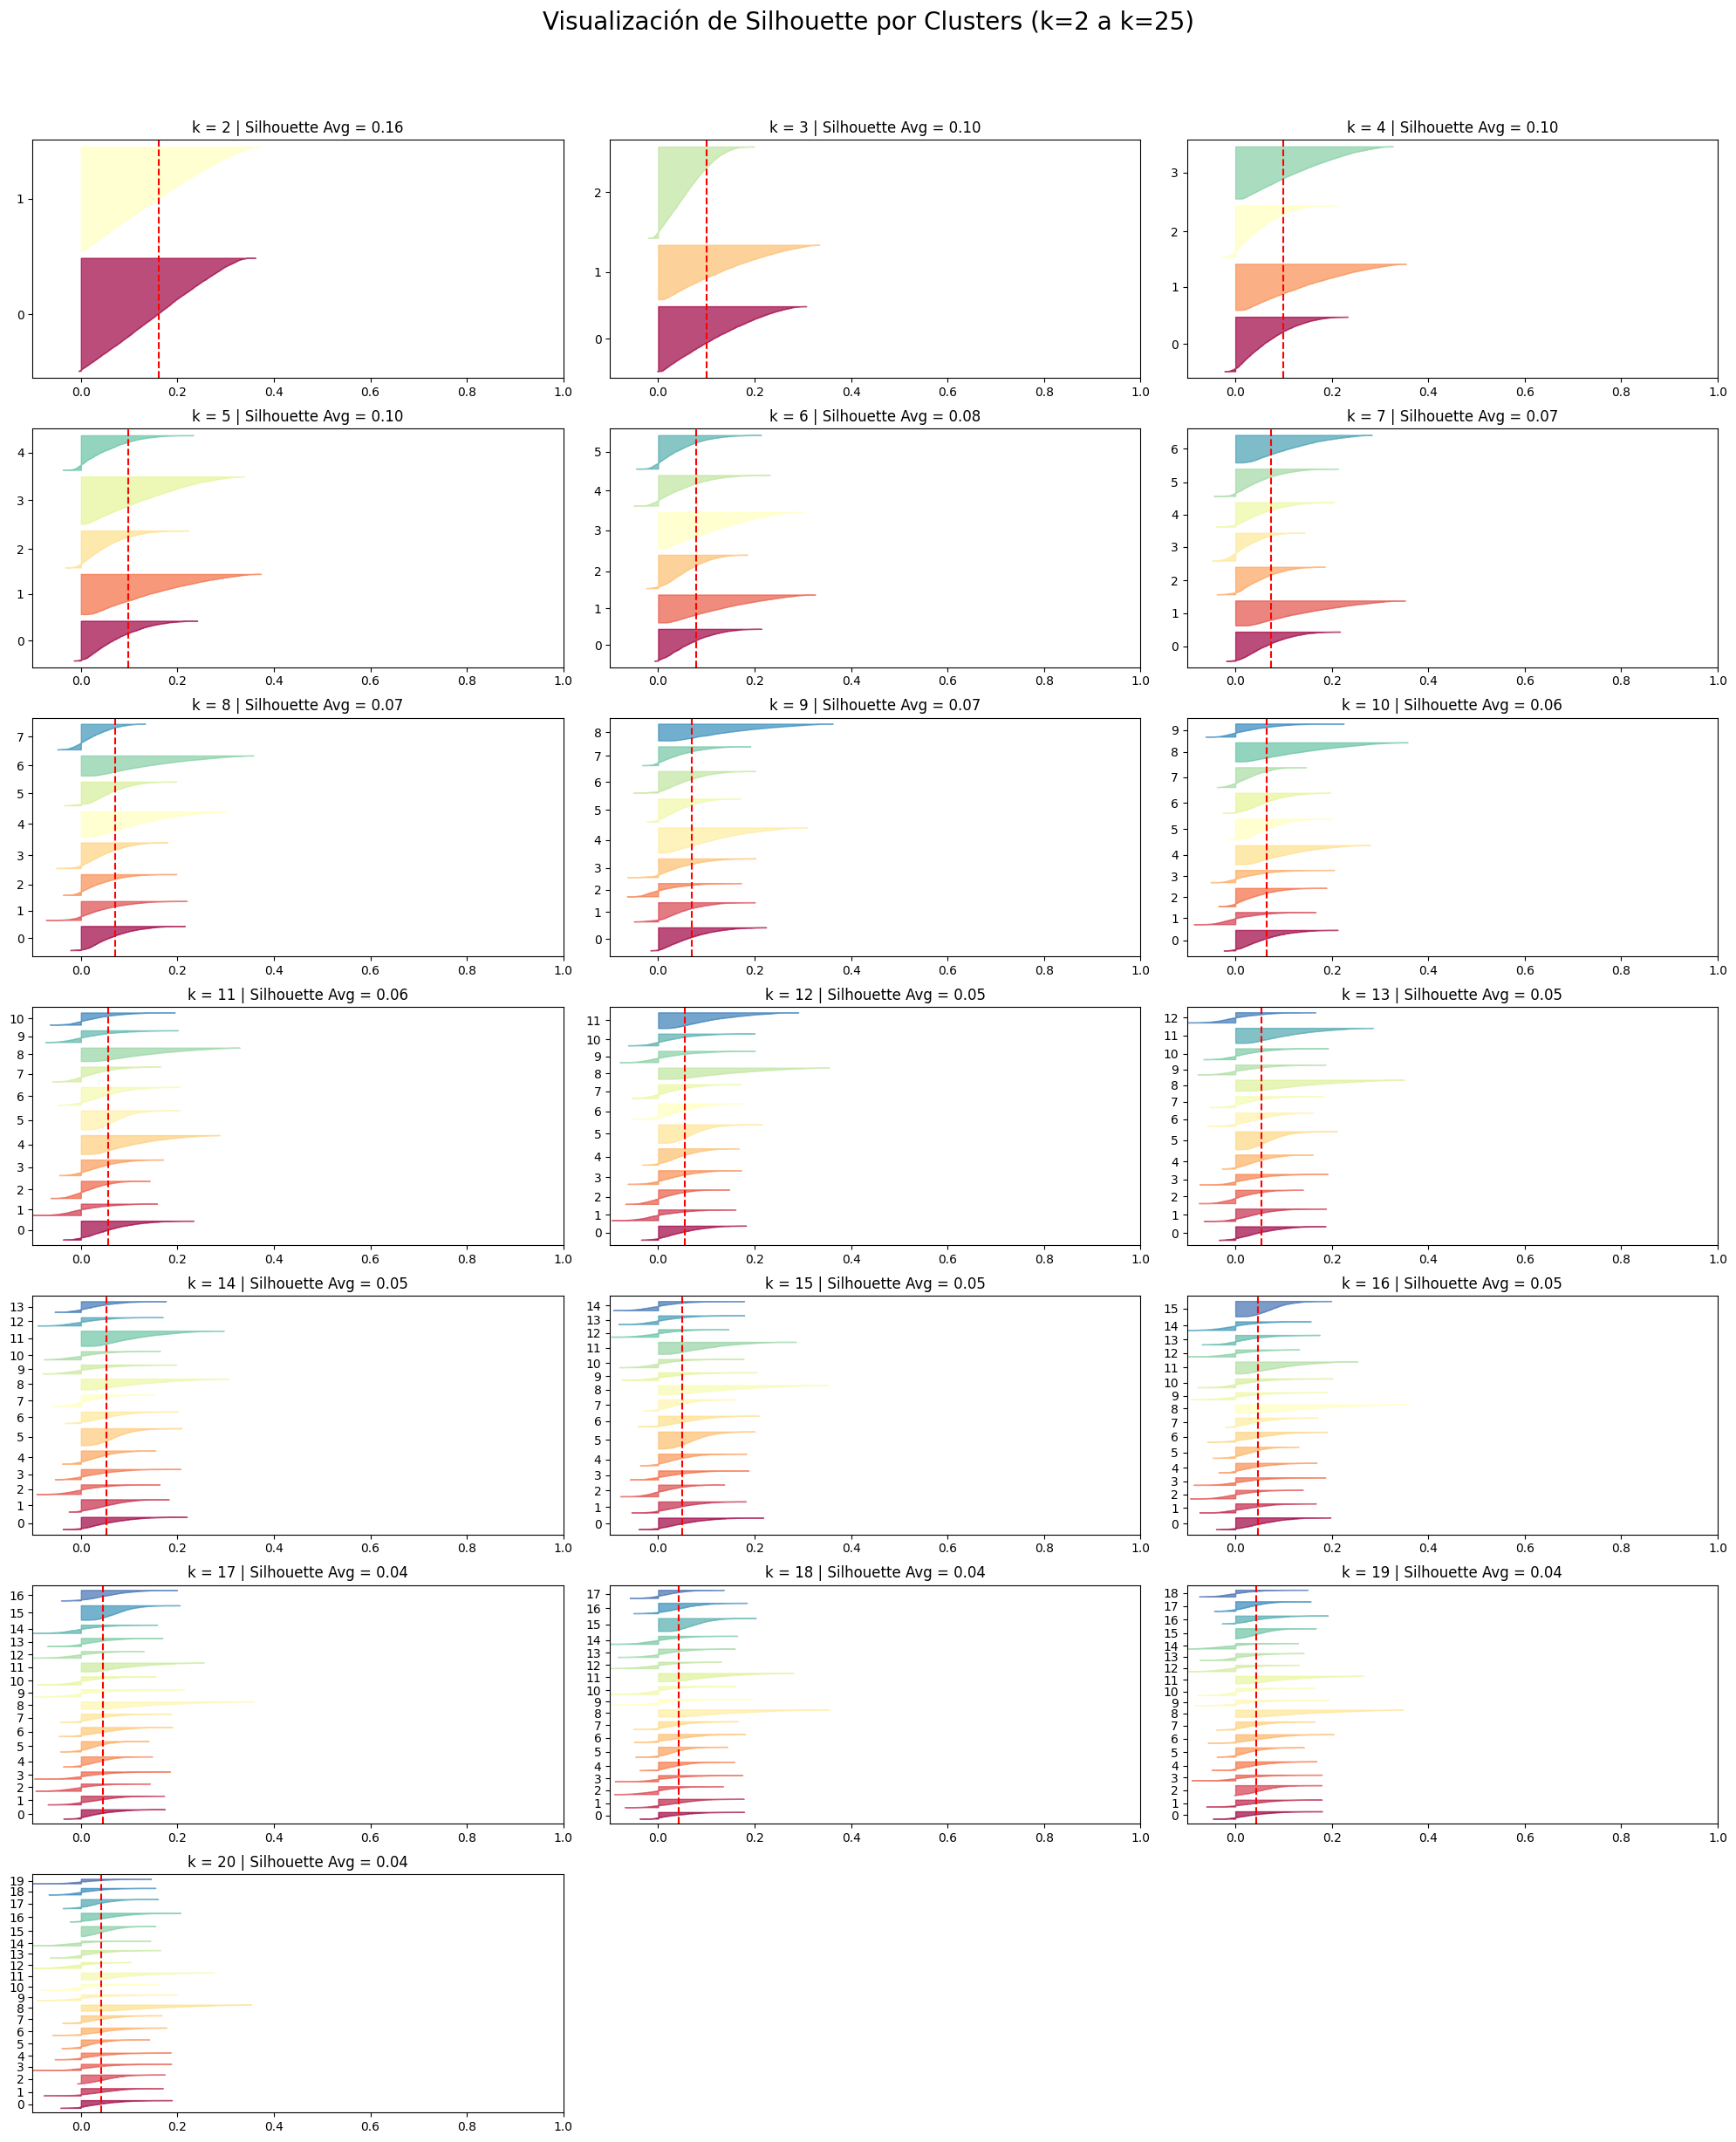

In [62]:
visualizar_silhouettes(X_train)

En este paso, se seleccionan los puntos más representativos de cada clúster. La idea es identificar los ejemplos más cercanos a los centroides de los clústeres para tener una representación representativa de cada uno.

In [11]:
# Representativos
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[idxs]
#y_representative_digits = y_train[idxs]

Este bloque de código muestra visualmente los ejemplos más representativos de cada clúster, que fueron seleccionados en el paso anterior.

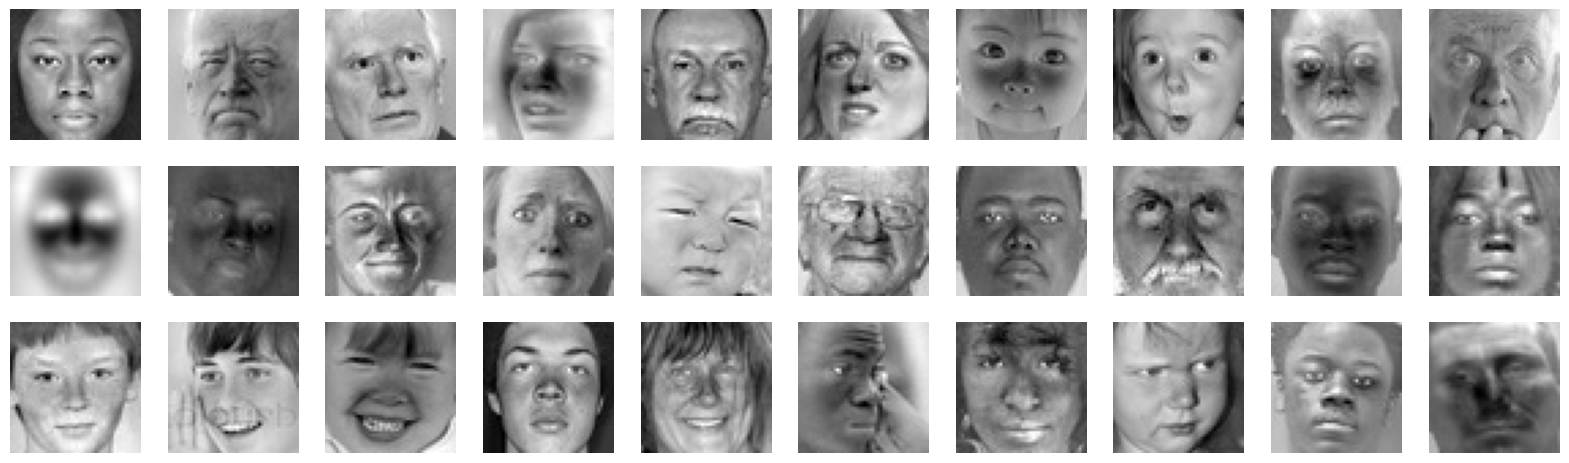

In [12]:
# Mostrar representativos
plt.figure(figsize=(20, 20))
for i, img in enumerate(X_representative_digits):
    plt.subplot(10, 10, i + 1)
    plt.imshow(img.reshape(48, 48), cmap="gray")
    plt.axis('off')
plt.show()

0-> serio
1-> feliz
2-> triste
3-> sorprendido
5-> neutro
6-> nose sabe

Extrae las clases reales (etiquetas originales) correspondientes a las imágenes representativas seleccionadas previamente con KMeans.

In [13]:
#print("Índices de los representativos:", idxs)
#y_representative_digits = y_train[idxs]
#print("Clases de los representativos:", y_representative_digits)
#0-> serio
#1-> feliz
#2-> triste
#3-> sorprendido
#5-> neutro
#6-> nose sabe
y_representative_digits = [0,0,0,3,2,6,1,3,5,4,6,0,1,6,5,5,0,0,0,0,1,1,1,0,1,1,0,5,0,0]

#y_representative_digits = [1,1,6,0,2,0,6,0,6,6,0,1,1,6,0,0,0,1,0,0,
#                           3,0,5,1,1,3,1,1,5,5,0,5,6,0,5,3,0,5,6,0,
#                          6,1,1,1,6,1,5,0,5,6,0,2,0,1,3,1,1,1,6,6,
#                           6,5,0,0,0,6,0,6,1,0,2,1,3,6,1,0,1,0,0,1,
#                           0,1,6,1,6,0,1,5,6,6,0,2,6,5,0,1,0,1,0,1]#
print("Clases de los representativos:", y_representative_digits)


Clases de los representativos: [0, 0, 0, 3, 2, 6, 1, 3, 5, 4, 6, 0, 1, 6, 5, 5, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 5, 0, 0]


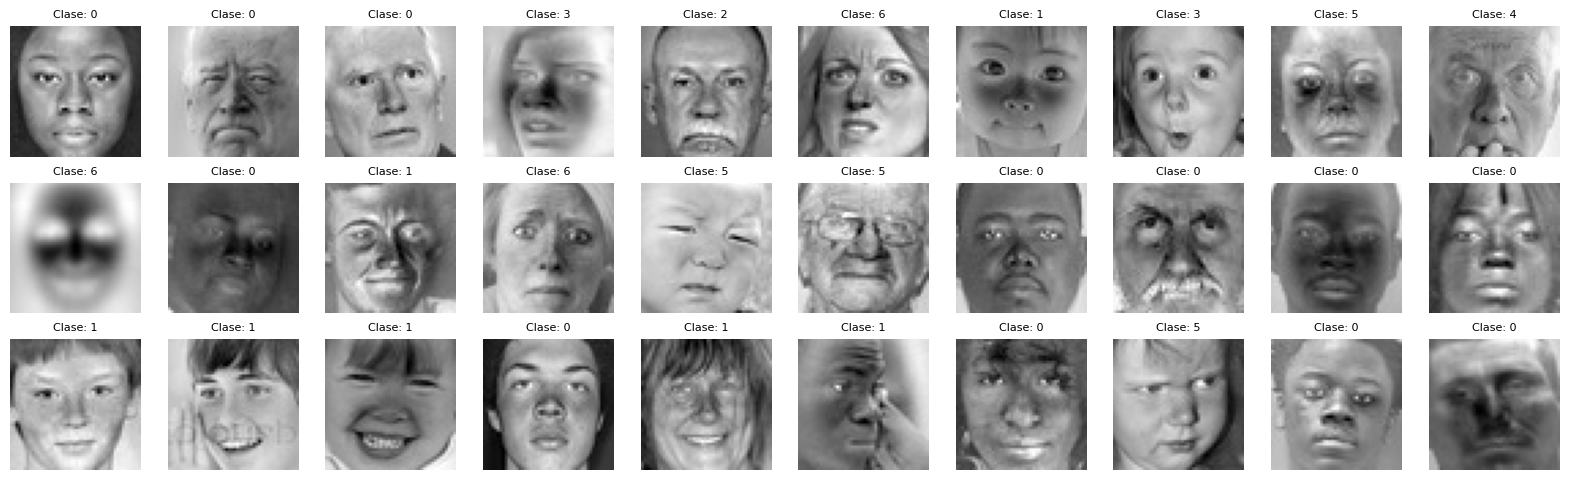

In [14]:
plt.figure(figsize=(20, 20))
for i, idx in enumerate(idxs):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[idx].reshape(48, 48), cmap='gray')
    plt.title(f"Clase: {y_representative_digits[i]}", fontsize=8)
    plt.axis('off')
plt.show()

Esto nos permitira comprobar si usar solo los ejemplos más representativos (uno por clúster) puede ser suficiente para clasificar correctamente nuevas imágenes.

In [31]:
from sklearn.linear_model import LogisticRegression
from time import time

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

start = time()
log_reg2.fit(X_representative_digits, y_representative_digits)
print("Entrenamiento terminado en %.2f segundos" % (time() - start))

score = log_reg2.score(X_test, y_test)
print("Precisión en test set con representantes:", score)

c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento terminado en 0.44 segundos
Precisión en test set con representantes: 0.1134020618556701


Aquí se entrena con 28709 imágenes aleatorias (no representativas) para ver si es mejor entrenar con representantes seleccionados por clustering o imágenes al azar. Sirve como comparación.

In [29]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50000, random_state=42)
%time log_reg.fit(X_train[:28709], y_train[:28709])
log_reg.score(X_test, y_test)

c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 39min 56s
Wall time: 3min 19s


0.34076344385622737

Esta técnica simula un etiquetado automático, útil cuando se quiere reducir el esfuerzo de etiquetado manual, basándose en pocos ejemplos representativos.

In [17]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
print(len(y_train_propagated))

28709


Entrenamientos con las muestras y su etiquetado

In [34]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (80%) y prueba (20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train_propagated, test_size=0.2, random_state=42, stratify=y_train_propagated
)

print("Tamaño del conjunto de entrenamiento:", len(X_train_split))
print("Tamaño del conjunto de prueba:", len(X_test_split))


Tamaño del conjunto de entrenamiento: 22967
Tamaño del conjunto de prueba: 5742


Se entrena un modelo de regresión logística usando solo una porción de los datos con etiquetas propagadas

In [33]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos con los datos propagados (80% del total)
%time log_reg3.fit(X_train_split, y_train_split)

# Evaluamos con el 20% restante
score = log_reg3.score(X_test_split, y_test_split)
print("Precisión con etiquetas propagadas:", score)


c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 32min 33s
Wall time: 2min 54s
Precisión con etiquetas propagadas: 0.44531522117729017


# Aprendizaje Activo

El aprendizaje activo es una técnica de aprendizaje automático en la que el modelo selecciona de manera inteligente qué ejemplos etiquetar, con el objetivo de mejorar su rendimiento usando la menor cantidad posible de datos etiquetados.

identificar ejemplos sobre los cuales el modelo está menos confiado, para luego ser etiquetados manualmente o revisados como parte del proceso de aprendizaje activo.

In [37]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Predecir probabilidades sobre los primeros 5000 datos
probas = log_reg3.predict_proba(X_train[:5000])
#print(probas)
# Paso 2: Tomar el índice de la clase con mayor probabilidad
labels_ixs = np.argmax(probas, axis=1)

# Paso 3: Obtener las probabilidades asociadas a esas clases
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])

# Paso 4: Ordenar por menor confianza
sorted_ixs = np.argsort(labels)
# print(sorted_ixs)


visualizacion de los ejemplos más inciertos según el modelo entrenado:

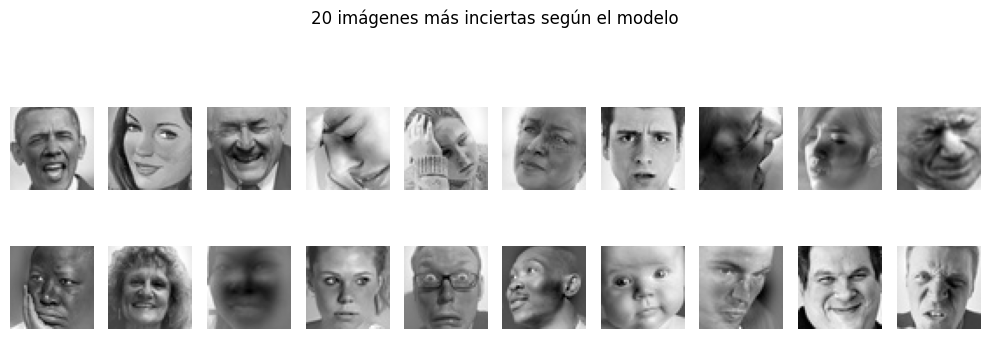

In [38]:
# k es la cantidad de ejemplos más inciertos que quieres seleccionar
k = 20 

# Paso 5: Seleccionar los k ejemplos más inciertos
X_lowest = X_train[sorted_ixs[:k]]

# Visualizar las imágenes más inciertas
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(2, 10, index + 1)
    plt.imshow(img.reshape(48, 48), cmap="gray")
    plt.axis('off')
plt.suptitle(f"{k} imágenes más inciertas según el modelo")
plt.tight_layout()
plt.show()

comparar las predicciones inciertas con sus etiquetas reales

In [39]:
#0-> serio
#1-> feliz
#2-> triste
#3-> sorprendido
#5-> neutro
#6-> nose sabe
y_lowest =[6,0,0,3,6,1,3,6,6,1,2,1,0,3,6,1,6,1,3,6]

Asegurarse de que los ejemplos más inciertos tengan etiquetas correctas para mejorar el aprendizaje

In [40]:
y_train2 = y_train_propagated[:5000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

Este bloque se realiza el entrenamiento de un modelo de regresión logística después de aplicar el aprendizaje activo para corregir las etiquetas de los ejemplos más inciertos

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=7000, random_state=42)
%time log_reg5.fit(X_train[:5000], y_train2)

score = log_reg5.score(X_test, y_test)
print(f"Precisión tras corrección activa de {k} ejemplos: {score}")

c:\Users\OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 3min 35s
Wall time: 25.4 s
Precisión tras corrección activa de 20 ejemplos: 0.12538311507383673


: 

# Punto 3

# DBSCAN

In [37]:
X_nor= featureNormalize(X_train[:5000])

In [38]:
print("Forma original:", X_train.shape)

# Aplanar las imágenes a vectores 1D (n_samples, 2304)
X_flat = X_train.reshape((X_train.shape[0], -1))
print("Forma aplanada:", X_flat.shape)

Forma original: (28709, 2304)
Forma aplanada: (28709, 2304)


In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=5)
dbscan.fit(X_nor)

DBSCAN(eps=3.0)

In [40]:
import matplotlib.pyplot as plt
# Ver etiquetas encontradas
print("Etiquetas únicas:", np.unique(dbscan.labels_))

Etiquetas únicas: [-1]


In [41]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

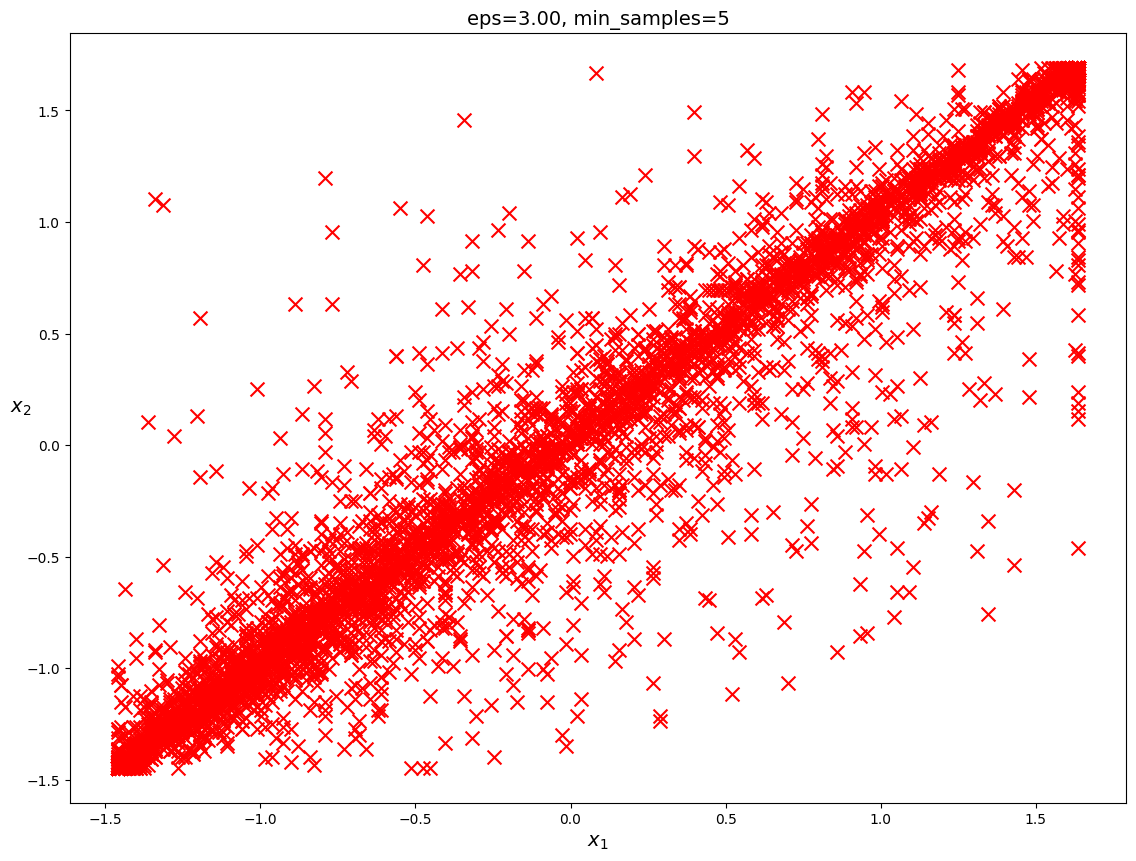

In [42]:
plt.figure(figsize=(30, 10))

plt.subplot(121)
plot_dbscan(dbscan, X_nor, size=100)

plt.show()

# Gaussian Mixtures

In [54]:
np.random.seed(42)  # Para resultados reproducibles
idx = np.random.choice(X.shape[0], 100, replace=False)
X_subset = X[idx]
X_gau = featureNormalize(X_subset)
print("Forma original:", X_gau.shape)

Forma original: (100, 2304)


In [60]:
pca = PCA(n_components=2, random_state=42)
X_2D = pca.fit_transform(X_gau)
print("Forma original:", X_2D.shape)


Forma original: (100, 2)


In [61]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_2D)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [62]:
from matplotlib.colors import LogNorm
# Paso 4: Visualizar la distribución en el espacio reducido con PCA
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Invertimos PCA para proyectar de regreso al espacio original (aproximación)
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_original = pca.inverse_transform(X_grid)
    
    # Calcular densidades en el espacio original
    Z = -clusterer.score_samples(X_grid_original)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z_clusters = clusterer.predict(X_grid_original)
    Z_clusters = Z_clusters.reshape(xx.shape)
    plt.contour(xx, yy, Z_clusters,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [64]:
import gc

del X  # o del X_nor, gm, etc., lo que sea grande
gc.collect()


2135

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_2D)
plt.title("GMM aplicado a imágenes (visualización PCA)")
plt.show()